In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df  = pd.read_csv('online_retail.csv',encoding='latin1')

In [45]:
df.sample(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
284590,561878,22971,QUEENS GUARD COFFEE MUG,6,2011-07-31 12:34:00,2.55,17388.0,United Kingdom,15.30
522663,580405,23008,DOLLY GIRL BABY GIFT SET,1,2011-12-04 12:02:00,16.95,14720.0,United Kingdom,16.95
422531,573094,22619,SET OF 6 SOLDIER SKITTLES,3,2011-10-27 14:39:00,3.75,15707.0,United Kingdom,11.25


In [17]:
df.isnull().mean()*100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [47]:
df.size

3580956

# Data Cleaning

In [18]:
df = df.dropna()

In [19]:
df = df[~df["InvoiceNo"].astype(str).str.startswith("C")]

In [20]:
df = df[(df["Quantity"] > 0) & (df["UnitPrice"] > 0)]

# Creating Revenue Column

In [21]:
df["Revenue"] = df["Quantity"] * df["UnitPrice"]

In [22]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

In [53]:
df.to_csv("cleaned_online_retail.csv", index=False)

# Visualizing Data

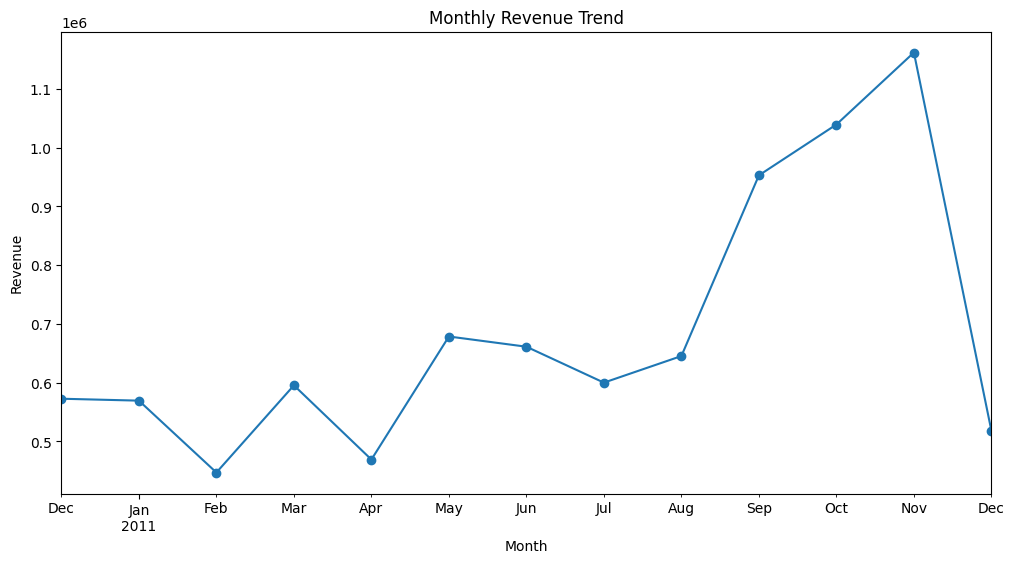

In [50]:
# Monthly Revenue Trend

monthly_revenue = (df.set_index("InvoiceDate")
      .resample("ME")["Revenue"]
      .sum())

plt.figure(figsize=(12,6))
monthly_revenue.plot(
marker='o',
markersize=6)

plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()

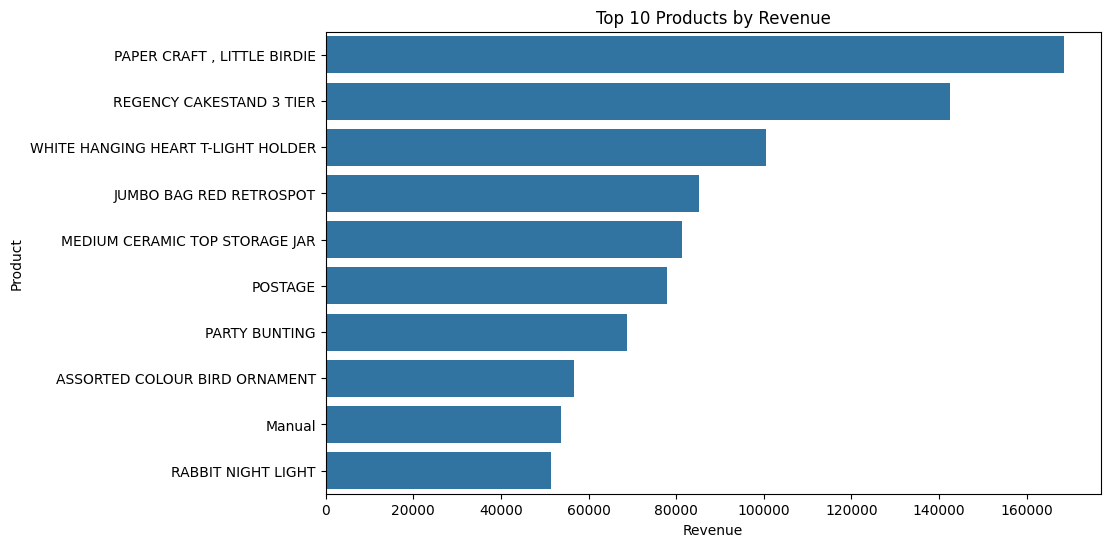

In [49]:
# Top-Selling Products

top_products = (df.groupby("Description")["Revenue"]
      .sum()
      .sort_values(ascending=False)
      .head(10))

plt.figure(figsize=(10,6))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title("Top 10 Products by Revenue")
plt.xlabel("Revenue")
plt.ylabel("Product")
plt.show()

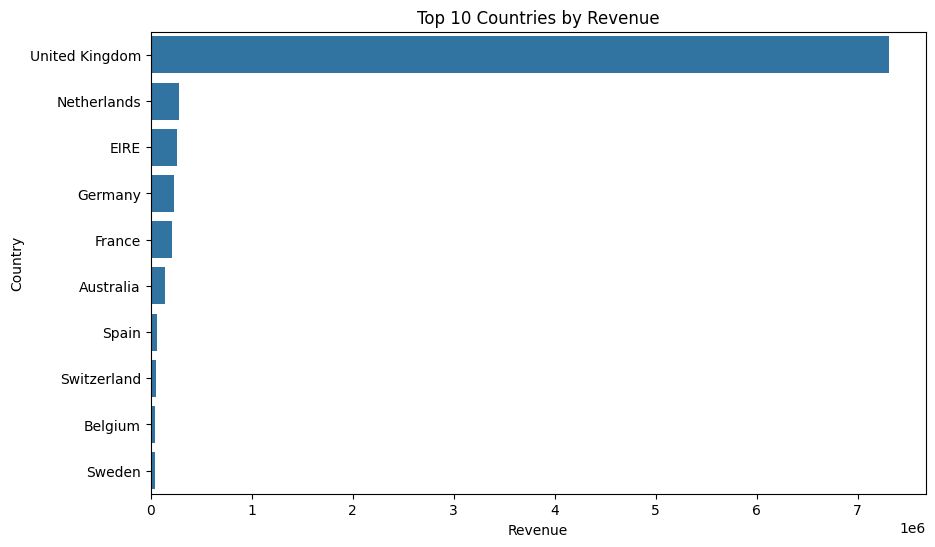

In [52]:
# High-Value Countries Regional Performance
country_revenue = (
    df.groupby("Country")["Revenue"]
      .sum()
      .sort_values(ascending=False)
      .head(10)
)

plt.figure(figsize=(10,6))
sns.barplot(x=country_revenue.values, y=country_revenue.index)
plt.title("Top 10 Countries by Revenue")
plt.xlabel("Revenue")
plt.ylabel("Country")
plt.show()